In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
train_dir='/content/drive/My Drive/cats_and_dogs_small/train'
validation_dir='/content/drive/My Drive/cats_and_dogs_small/validation'

train_cats_dir='/content/drive/My Drive/cats_and_dogs_small/train/Cat'
train_dogs_dir='/content/drive/My Drive/cats_and_dogs_small/train/Dog'
validation_cats_dir='/content/drive/My Drive/cats_and_dogs_small/validation/Cat'
validation_dogs_dir='/content/drive/My Drive/cats_and_dogs_small/validation/Dog'

In [12]:
num_cats_tr=len(train_cats_dir)
num_dogs_tr=len(train_dogs_dir)


num_cats_val=len(validation_cats_dir)
num_dogs_val=len(validation_dogs_dir)

total_train=num_cats_tr + num_dogs_tr
total_validation=num_cats_val + num_dogs_val

In [14]:
print('total training cat images', num_cats_tr)
print('total training dog images', num_dogs_tr)

print('total validation cat images', num_cats_val)
print('total validation dog images', num_dogs_val)
print("--")
print("Total Training Images", total_train)
print("Total Validation Images", total_validation)

total training cat images 53
total training dog images 53
total validation cat images 58
total validation dog images 58
--
Total Training Images 106
Total Validation Images 116


In [19]:
BATCH_SIZE=100
IMG_SHAPE=150

In [20]:
train_image_generator= ImageDataGenerator(rescale=1./255)
validation_image_generator=ImageDataGenerator(rescale=1./255)

In [21]:
train_data_gen=train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=train_dir,
                                                         shuffle=True,
                                                         target_size=(IMG_SHAPE, IMG_SHAPE),
                                                         class_mode='binary')

Found 198 images belonging to 2 classes.


In [22]:
val_data_gen=validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                            directory=validation_dir,
                                                            shuffle=False,
                                                            target_size=(IMG_SHAPE, IMG_SHAPE),
                                                            class_mode='binary')

Found 100 images belonging to 2 classes.


In [23]:
sample_training_images, _=next(train_data_gen)

In [25]:
def plot_imagess(images_arr):
    fig, axes=plt.subplots(1, 5, figsize=(20, 20))
    axes=axes.flatten()
    for img, ax in zip(images_arr, axes):
      ax.imshow(img)
    plt.tight_layout()
    plt.show()

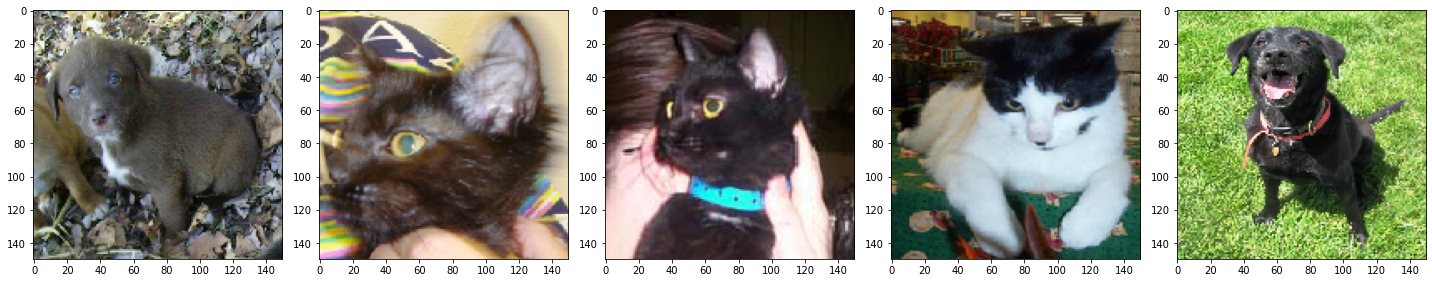

In [27]:
plot_imagess(sample_training_images[:5])

In [29]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [37]:
EPOCHS=100
history=model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))
)

Epoch 1/100
2/2 [==============================] - 1s 632ms/step - loss: 3.5687e-05 - accuracy: 1.0000 - val_loss: 2.6893 - val_accuracy: 0.6700
Epoch 2/100
2/2 [==============================] - 0s 230ms/step - loss: 3.5150e-05 - accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 229ms/step - loss: 3.4617e-05 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 237ms/step - loss: 3.4157e-05 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 233ms/step - loss: 3.3701e-05 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 233ms/step - loss: 3.3150e-05 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 225ms/step - loss: 3.2728e-05 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 235ms/step - loss: 3.2288e-05 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 228ms/step - loss: 3.1827e-05 - accuracy: 1.0000
Epoch 10/100
2/2 [=============